# NURBS 2D (3)
### Abordagem definindo estrutura de criação de funções para implementação de refinamento

In [4]:
import sympy as sp
import pylab as pl
from jhc.AuxDisplay import *
from itertools import product

import jhc.nurbs as nb

sp.init_printing(use_latex=True)

%matplotlib inline

# Definindo funções bases B-Spline

## 2.1 - Funções B-spline

Para um vetor de knots $\Xi$:

\begin{equation}
    \Xi = [\xi_0, \xi_1, ..., \xi_{n+p+1}]
\end{equation}

A i-ésima função de base B-spline de grau p, denotada por $N_{i, p}(x)$, é definida como:

\begin{equation}
N_{i,0}(x) = \left\{
\begin{matrix} 
1 & \mathrm{se} \quad \xi_i \leq x < \xi_{i+1} \\
0 & \mathrm{c.c.} 
\end{matrix}
\right.
\end{equation}

Para $p = 1, 2, ...$, define-se:

\begin{equation}
N_{i,p}(x) = \frac{x - \xi_i}{\xi_{i+p} - \xi_i} N_{i,p-1}(x) + \frac{\xi_{i+p+1} - x}{\xi_{i+p+1} - \xi_{i+1}} N_{i+1,p-1}(x)
\end{equation}

## Exemplo de mudança de grau

\Xi  = [0  0  0  1  2  3  4  4  5  5  5]

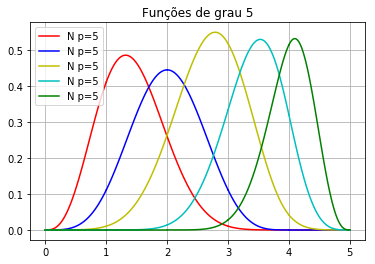

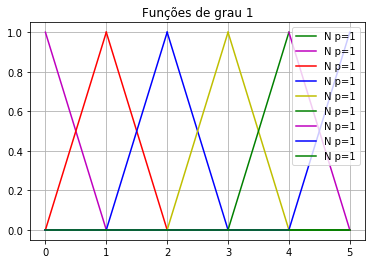

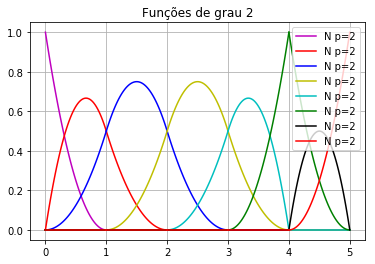

In [5]:
knots = (0, 0, 0, 1, 2, 3, 4, 4, 5, 5, 5)
displayEq('\Xi', sp.Array(knots))

# Criando base de grau p=5
B = nb.BasesNURBS(knots, p=5)
B.plotBase()

# Decaindo grau para p=1
B.decairGrau(p=1)
B.plotBase()

# Elevando grau para p=2
B.elevarGrau(p=2)
B.plotBase()

\Xi  = [0  0  0  1  2  3  4  4  5  5  5]

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


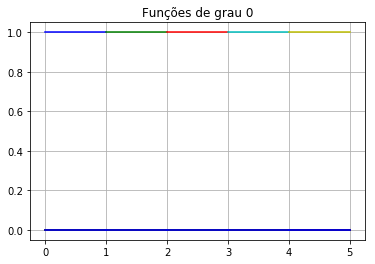

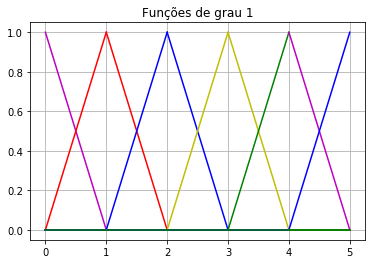

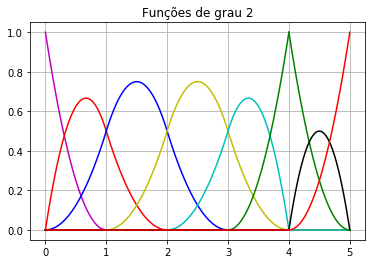

In [4]:
knots = (0, 0, 0, 1, 2, 3, 4, 4, 5, 5, 5)
displayEq('\Xi', sp.Array(knots))

# Criando base de grau p=5
B = nb.BasesNURBS(knots)
f = pl.figure()
B.plotBase()
B.elevarGrau()
B.plotBase()
B.elevarGrau()
B.plotBase()

## Exemplo de refinamento h

\Xi_1  = [0  0  0  1  2  3  4  4  5  5  5]

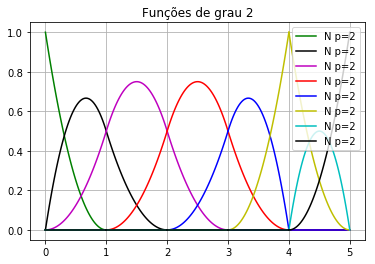

\Xi_1  = [0  0  0  0.5  1  1.5  2  2.5  3  3.5  4  4.0  4  4.5  5  5  5]

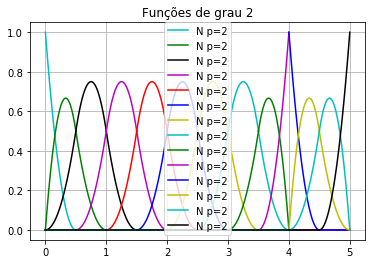

In [10]:
p = 2

knots = (0, 0, 0, 1, 2, 3, 4, 4, 5, 5, 5)
displayEq('\Xi_1', sp.Array(knots))

B1 = nb.BasesNURBS(knots, p)
B1.plotBase()

B2 = B1.refinamento_h()
displayEq('\Xi_1', sp.Array(B2.knots))
B2.plotBase()

### Análise do gasto de memória

### 2.1.1  - Curva B-spline
#### Construindo curva Spline para um conjunto de pontos

Uma curva B-spline de grau $p$ é definida como:

\begin{equation}
    \textbf{S}(x) =\sum_{i=0}^{n} N_{i,p}(x) \textbf{P}_i 
\end{equation}

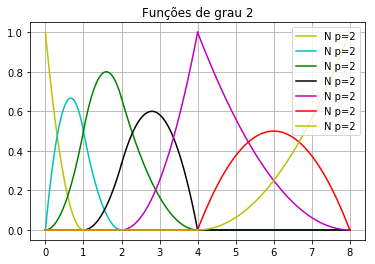

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


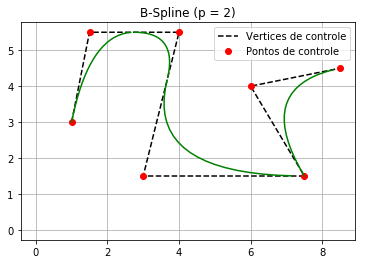

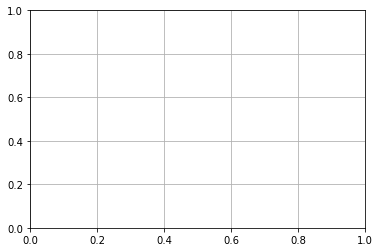

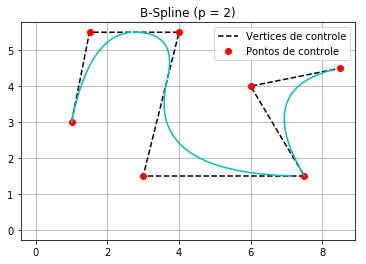

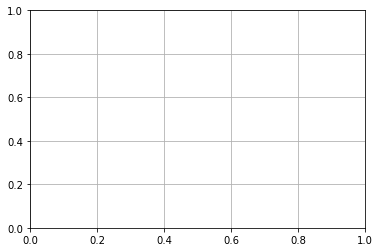

In [9]:
p = 2
knots = (0, 0, 0, 1, 2, 4, 4, 8, 8, 8)
B1 = nb.BasesNURBS(knots, p)
B1.plotBase()

P1 = [[1.0, 1.5, 4.0, 3.0, 7.5, 6.0, 8.5],
     [3.0, 5.5, 5.5, 1.5, 1.5, 4.0, 4.5]]

B1.curvaSpline2D(pontos=P1, title='B-Spline (p = %d)'%p)
B2 = B1.refinamento_h()
B1.curvaSpline2D(pontos=P1, title='B-Spline (p = %d)'%p)

### Definindo novos pontos de controle para o refinamento k

In [7]:
def refinamentoPontos(P):
    '''Aumenta o numero de pontos de P inserindo pontos médios'''
    P_ = []
    for i in P:
        i_ = list(i)
        for k in range(len(i_)-2, -1, -1):
            i_.insert(k+1, (i_[k]+i_[k+1])/2.0 )
        P_.append( i_ )
    return P_

In [ ]:
P2 = refinamentoPontos(P1)
B2 = B1.refinamento_h()

B2.plotBase()
B2.curvaSpline2D(pontos=P2, title='B-Spline (p = %d)'%p)

# Definindo funções NURBS

## 2.2 - Funções NURBS

### 2.2.1 - Curva NURBS

#### Exemplo 5

\Xi  = [0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0]

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


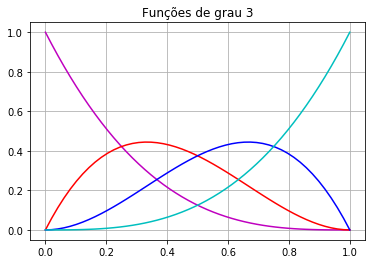

In [8]:
# knots = [0, 0, 0, 0, 1, 1, 1, 1]
p = 3
knots = nb.clamped_uniform_knots(0.0, 1.0, n=4, p=p)
displayEq('\Xi', sp.Array(knots))

B = nb.BasesNURBS(knots, p)
B.plotBase()

### Atribuindo pesos às bases

w  = [1  0.333333333333333  0.75  1]

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


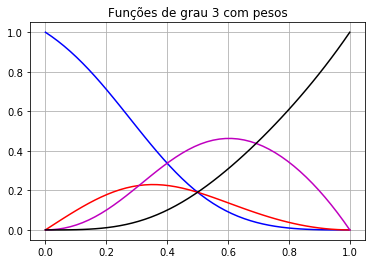

In [9]:
W = sp.Array([1, 1/3, 3/4, 1])
displayEq('w', W)
    
R = B.basePonderada(W, plotar=True)

### Contruindo curva para um conjunto de pontos

Uma curva NURBS é definida como:

\begin{equation}
    \textbf{C}(x) =\sum_{i=0}^{n} R_{i,p}(x) \textbf{P}_i
\end{equation}

onde:

\begin{equation}
    R_{i,n}(x) = {N_{i,n}(x)w_i \over \sum_{j=0}^k N_{j,n}(x)w_j}
\end{equation}

In [ ]:
P = [[0.1, 0.7, 0.3, 1.0],
     [0.5, 1.0, 0.2, 0.3]]

# podemos utilizar a mesmo procedimento
pl.title('NURBS 2D (p = %d)'%p)
nb.curvaSpline2D(base=R, pontos=P)

### Exemplo próprio

\Xi  = [0.0  0.0  0.2  0.4  0.6  0.8  1.0  1.0]

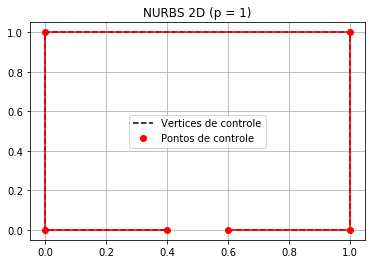

\Xi  = [0.0  0.0  0.0  0.25  0.5  0.75  1.0  1.0  1.0]

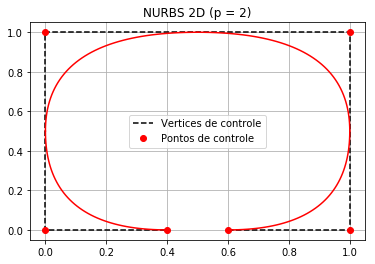

\Xi  = [0.0  0.0  0.0  0.0  0.333333333333333  0.666666666666667  1.0  1.0  1.
0  1.0]

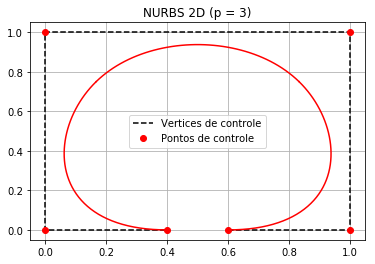

\Xi  = [0.0  0.0  0.0  0.0  0.0  0.5  1.0  1.0  1.0  1.0  1.0]

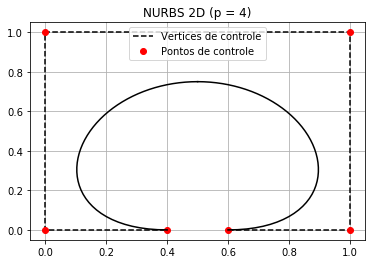

\Xi  = [0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0]

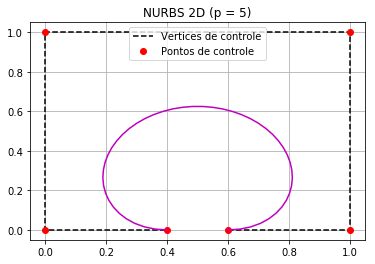

In [10]:
p_max = 5

for p in range(1, p_max+1):
    knots = nb.clamped_uniform_knots(0.0, 1.0, n=6, p=p)
    displayEq('\Xi', sp.Array(knots))
    
    B = nb.BasesNURBS(knots, p)
    # plotFuncoesSeg(N)

    P = [[0.6, 1.0, 1.0, 0.0, 0.0, 0.4],
         [0.0, 0.0, 1.0, 1.0, 0.0, 0.0]]

    # podemos utilizar a mesmo procedimento
    B.curvaSpline2D(pontos=P, title='NURBS 2D (p = %d)'%p)

## [Rascunhos...]